### 1D Linear Convection


Propogation of a wave with constant speed $c$, without change in shape

$\frac{\partial u}{\partial  t} + c \frac{\partial u}{\partial  x} = 0$

where:

- $u(x,t)$ is the function of the wave
- $c$ is the convection speed
- $x$ is spacial coordinate
- $t$ is time

$\frac{\partial u}{\partial t}$ - tells us how $u$ evolves over time, given fixed $x$

$\frac{\partial u}{\partial  x}$ - tells us how u varies across space at a fixed time

if $u(x,y)$ represents smoke concentration,
- $\frac{\partial u}{\partial t}$ represents how concentration at a point changes over time
- $\frac{\partial u}{\partial  x}$ represents how smoke concentration changes from one location to another

#### Discretize Equation

By the defination of derivative (forward difference):

$\frac{\partial u}{\partial x} \approx \frac{u(x + \Delta x) - u(x)}{\Delta x}$

So we can substitute our equation as, where $n$, $n+1$ are two consecutive time steps, and $i$, $i + 1$ are two neighboring points in discretized $x$:

$\frac{u_i^{n+1} - u_i^n}{\Delta t} + c \frac{u_{i}^{n} - u_{i-1}^n}{\Delta x} = 0$

In this example, we use forward difference for the time derivative, and backwards difference for the sapce derivative.

Given intial conditions, our only unknown is $u_i^{n+1}$, so rearranging we get:

$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x} (u_{i}^{n} - u_{i-1}^n) $

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

initial condition [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
dx 0.05 dt 0.025


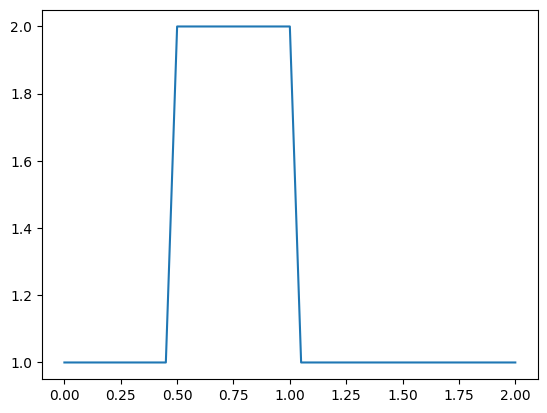

In [53]:
nx = 41 # 41 grid points
dx = 2 / (nx - 1) # total space is 2
nt = 25 # number of timesteps
dt = 0.025
c = 1 # wave speed

# intial conditions

u = np.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print("initial condition", u)
print("dx", dx, "dt", dt)

plt.plot(np.linspace(0, 2, nx), u);

$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x} (u_{i}^{n} - u_{i-1}^n) $

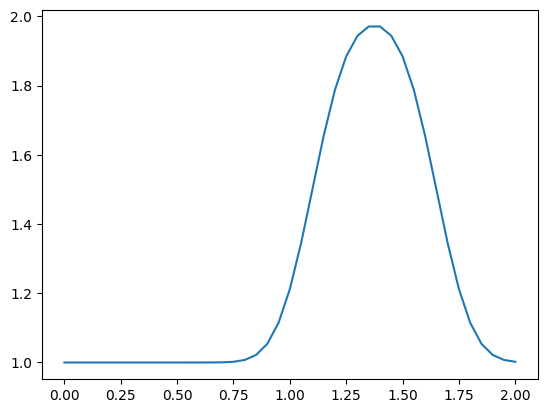

In [54]:
u = np.ones(nx)      #numpy function ones()
u[int(.5 / dx):int(1 / dx + 1)] = 2 

un = np.ones(nx)

iterations = []

for n in range(nt):
    iterations.append(u.copy())
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i-1])
        
plt.plot(np.linspace(0, 2, nx), u)

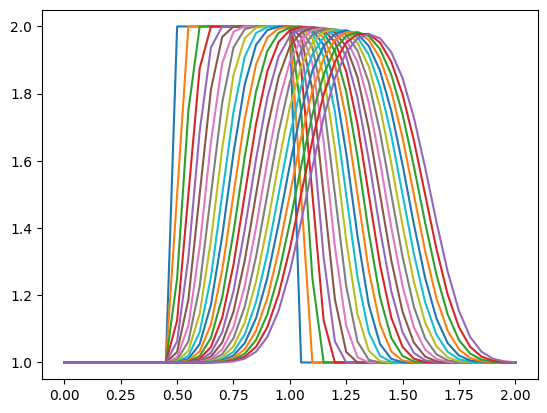

In [55]:
for i in iterations:
    plt.plot(np.linspace(0, 2, nx), i)

### 1D Non-Linear Convection

Same equation, but instead of $c$, we have the solution $u$ multiplying the second term

$\frac{\partial u}{\partial  t} + u \frac{\partial u}{\partial  x} = 0$

Descretizing using the same methods as above, we get

$u_i^{n+1} = u_i^n - u_{i}^n \frac{\Delta t}{\Delta x} (u_{i}^{n} - u_{i-1}^n) $

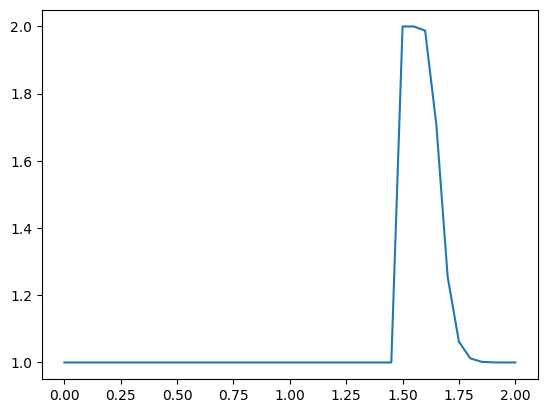

In [59]:
# reinstantiate all the variables
nx = 41
dx = 2 / (nx - 1)
nt = 20    
dt = .025  

# same initial hat function
u = np.ones(nx)      #numpy function ones()
# u[:] = -1
u[int(.5 / dx):int(1 / dx + 1)] = 2 

un = np.ones(nx)

iterations = []

for n in range(nt):
    iterations.append(u.copy())
    un = u.copy() # current step, u becomes next step
    for i in range(1, nx):
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])
    
plt.plot(np.linspace(0, 2, nx), u)
plt.show()

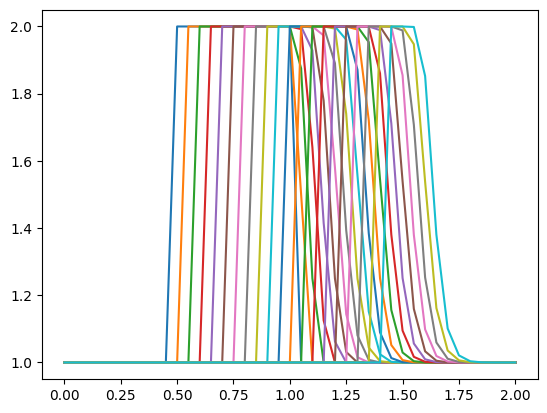

In [39]:
for i in iterations:
    plt.plot(np.linspace(0, 2, nx), i)

### Convergence and CFL Condition
https://drzgan.github.io/Python_CFD/4.%20CFL%20condition.html

Why did we select initial condtions `nx = 41` and `dt = 0.025`?
- Try nx = 41, 61, 81, 91, why does the result blow up when nx = 91? 
- When nx = 91, dx = 0.0222 < dt = 0.025

When nx = 91, in one time step, the wave traveled a distance > dx. ??? why is this bad

Either way, we want Courant/CFL number $\sigma = \frac{u\Delta t}{\Delta x} \leq \sigma_{max}$

We can enforce this by setting our $dt$ based on $dx$, CFL, and $c$, $dt = CFL * dx / c$


In general, as we have higher resolution, for numerical stability we want smaller timesteps. As the CFL number approaches one, we have more detailed approximation, but once it passes one, our numbers explode. We will set $CFL = 0.9$

### Upwind Scheme

When we have negative $c$, our solution experiences numerical instability.

This is because of the backwards differentiation we used for the $\frac{\partial u}{\partial  x}$ term.

We approximated $\frac{\partial u}{\partial  x}$ with $\frac{u_{i}^{n} - u_{i-1}^n}{\Delta x}$, where $n$ is time, and $i$ is x-position

Because of this, we are calculating the derivative by looking at the point to the left. This works when the wave is moving to the right, since we are using information from the left (upwind direction). However when $c$ is negative, we should be looking at the point to the right instead

We can use the upwind scheme to adjust the discretization method based on the sign of the convection (direction of motion)

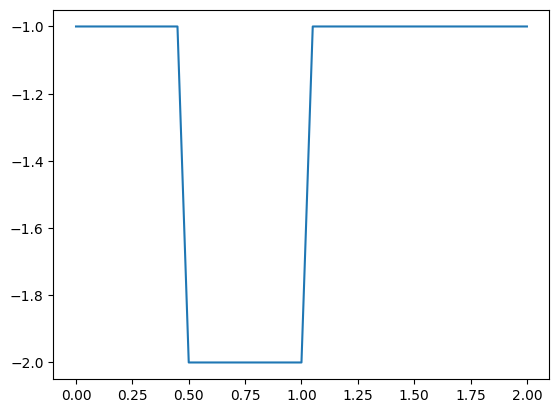

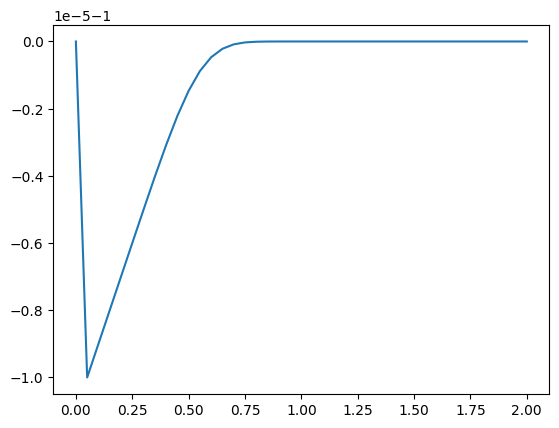

In [ ]:
u[:]= -1
u[int(.5 / dx) : int(1 / dx + 1)] = -2  #then set u = 2 between 0.5 and 1 as per our I.C.s

plt.plot(np.linspace(0, 2, nx), u)
plt.show()

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    
    F = lambda c: (max(c/(abs(c)+1e-6), 0), max(-c/(abs(c)+1e-6), 0))
    
    for i in range(1, nx-1):  ##now we'll iterate through the u array
        # Coefficients to the east side of the node (i+1)
        fe1, fe2 = F(u[i])
        # Coefficients to the west side of the node (i-1)
        fw1, fw2 = F(u[i])
        # Differential values on the east side interface
        ue = un[i] * fe1 + un[i+1] * fe2
        # Differential values on the wast side interface
        uw = un[i-1] * fw1 + un[i]* fw2
        u[i] = un[i] - un[i] * dt / dx * (ue - uw)

        #u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1])   
             
plt.plot(np.linspace(0, 2, nx), u) ##Plot the results
plt.show()